In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:

retention = pd.read_csv("C:/Users/VinArs/Documents/csvFiles/clean_retention.csv")
sessions = pd.read_csv("C:/Users/VinArs/Documents/csvFiles/clean_sessions.csv")
features = pd.read_csv("C:/Users/VinArs/Documents/csvFiles/clean_features.csv")
churn = pd.read_csv("C:/Users/VinArs/Documents/csvFiles/clean_churn.csv")

RETENTION ANALYSIS

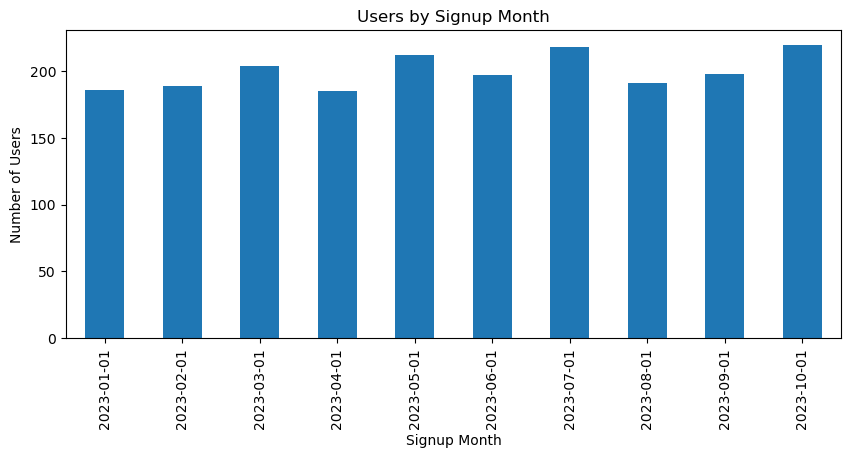

In [10]:
retention_per_month = retention.groupby(retention['signup_month']).size()

retention_per_month.plot(kind='bar', figsize=(10,4))
plt.title("Users by Signup Month")
plt.xlabel("Signup Month")
plt.ylabel("Number of Users")
plt.show()


Insight:
Most users signed up during october months. This means these months had higher user interest or activity.


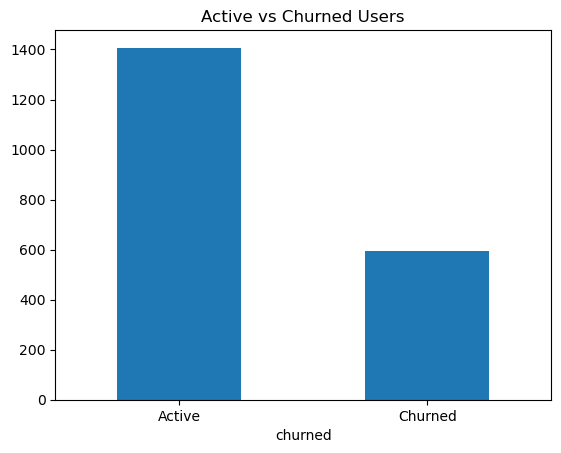

In [5]:
retention['churned'].value_counts().plot(kind='bar')
plt.title("Active vs Churned Users")
plt.xticks([0,1], ["Active", "Churned"], rotation=0)
plt.show()


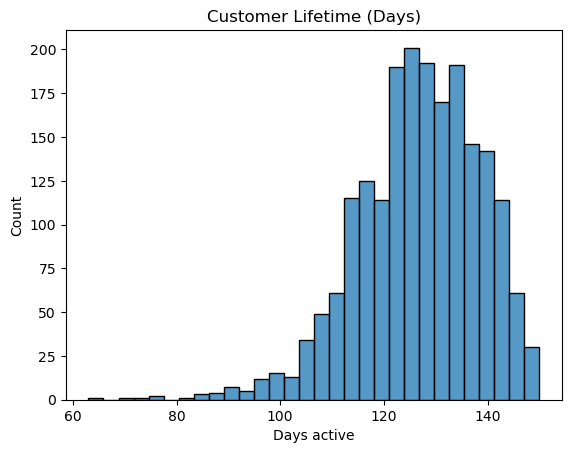

In [12]:
sns.histplot(retention['customer_lifetime_days'], kde=False, bins=30)
plt.title("Customer Lifetime (Days)")
plt.xlabel("Days active")
plt.show()


In [13]:
retention['customer_lifetime_days'].describe()


count    2000.000000
mean      126.708500
std        11.930536
min        63.000000
25%       119.000000
50%       127.000000
75%       135.000000
max       150.000000
Name: customer_lifetime_days, dtype: float64

In [ ]:
Insight:
Most users stay active for 120 to 140 days. Many users stop using the product early, which shows early engagement may be low.


session Related analysis

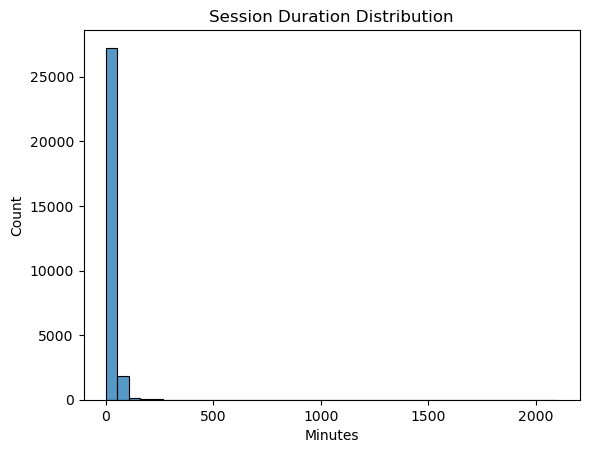

In [7]:
sns.histplot(sessions['session_duration_minutes'], bins=40)
plt.title("Session Duration Distribution")
plt.xlabel("Minutes")
plt.show()


In [14]:
sessions['session_duration_minutes'].describe()

count    29404.000000
mean        22.871616
std         54.808464
min          1.000000
25%          5.000000
50%         14.000000
75%         28.000000
max       2100.000000
Name: session_duration_minutes, dtype: float64

In [ ]:
Insight:
There is ouliers present so we have to remove these outliers for clear analysis 


applying cap for avoiding outliers

In [16]:
upper = sessions['session_duration_minutes'].quantile(0.99)

sessions['session_duration_minutes_capped'] = sessions['session_duration_minutes'].clip(upper=upper)


In [18]:
sessions['session_duration_minutes_capped'].describe()


count    29404.000000
mean        20.130225
std         21.017593
min          1.000000
25%          5.000000
50%         14.000000
75%         28.000000
max        115.970000
Name: session_duration_minutes_capped, dtype: float64

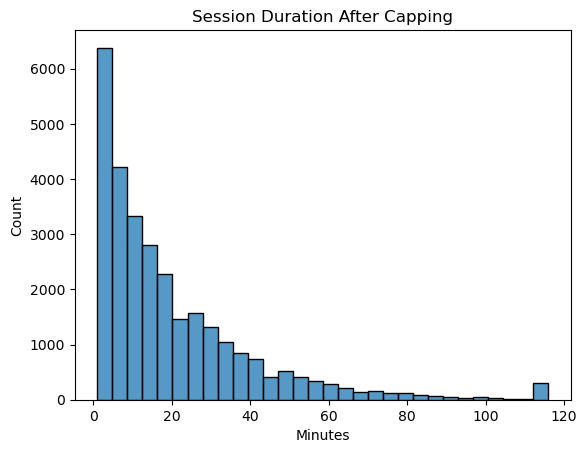

In [20]:
sns.histplot(sessions['session_duration_minutes_capped'], bins=30)
plt.title("Session Duration After Capping")
plt.xlabel("Minutes")
plt.show()


final insights-:

Most users spend between 0 and 40 minutes per session.
The mean session duration is 20 minutes, meaning half of all sessions are below 20 minutes.



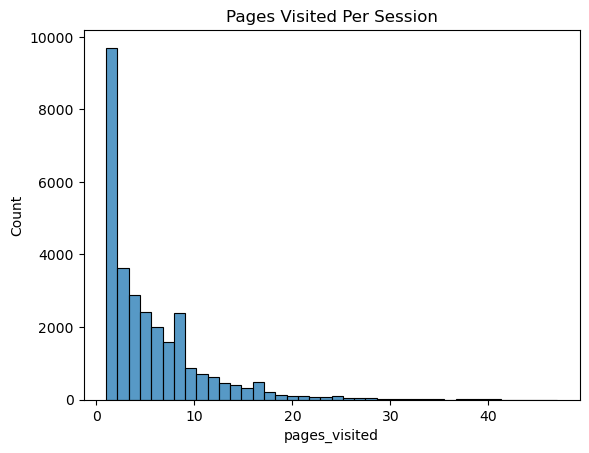

In [8]:
sns.histplot(sessions['pages_visited'], bins=40)
plt.title("Pages Visited Per Session")
plt.show()


In [21]:
sessions['pages_visited'].describe()

count    29404.000000
mean         5.509012
std          5.010911
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         47.000000
Name: pages_visited, dtype: float64

Insight:
-The distribution of pages visited is right-skewed, indicating that most users interact 
with only a small number of pages during a session.
-the majority of users demonstrate quick, goal-oriented navigation through the product.

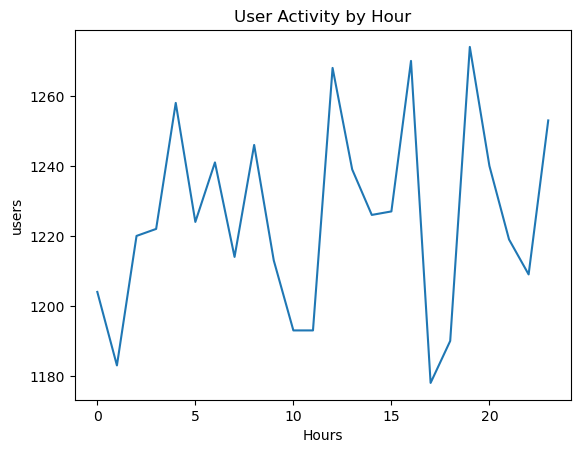

In [26]:
sessions.groupby('hour').size().plot(kind='line')
plt.title("User Activity by Hour")
plt.xlabel("Hours")
plt.ylabel("users")
plt.show()


Insight:
User activity is highest around 20 hours. This shows when users mostly use the product.


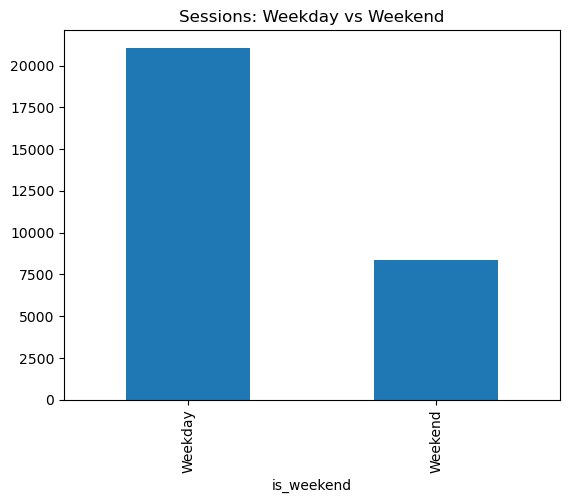

In [10]:
sessions['is_weekend'].value_counts().plot(kind='bar')
plt.title("Sessions: Weekday vs Weekend")
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.show()


Insight:
Users are  less active on weekends compared to weekdays.


FEATURE BASED ANALYSIS

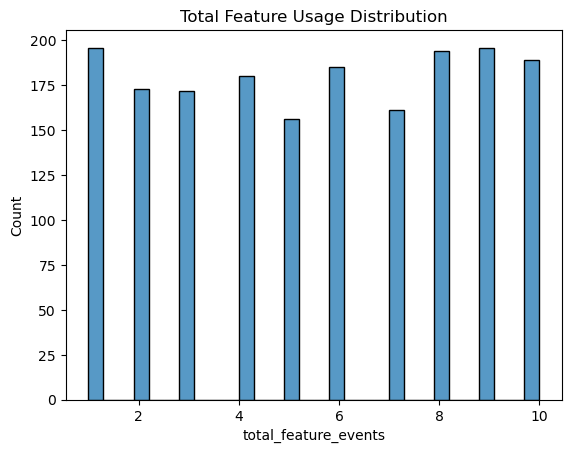

In [11]:

sns.histplot(features['total_feature_events'], bins=30)
plt.title("Total Feature Usage Distribution")
plt.show()


In [24]:
features['total_feature_events'].describe()

count    1802.000000
mean        5.549945
std         2.929109
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: total_feature_events, dtype: float64

Insight:
-Predictable product behavior.
-No extreme or abnormal usage.
-Good consistency across users.

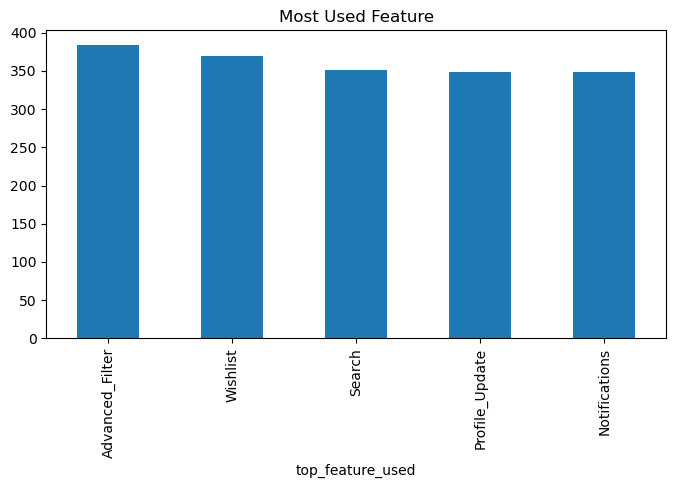

In [12]:
features['top_feature_used'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Most Used Feature")
plt.show()


Insight:
The feature used the most is Advanced_filter. means users find this feature most helpful.


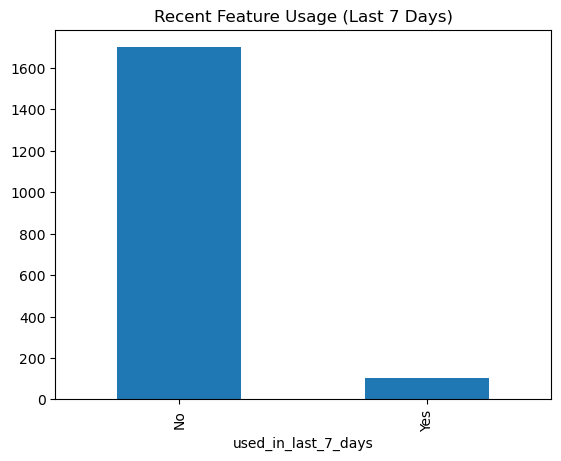

In [13]:
features['used_in_last_7_days'].value_counts().plot(kind='bar')
plt.title("Recent Feature Usage (Last 7 Days)")
plt.xticks([0,1], ["No", "Yes"])
plt.show()


Insight:
Only 16% of users used any feature in the last 7 days.It shows low recent activity.


CHRUN RELATED ANALYSIS

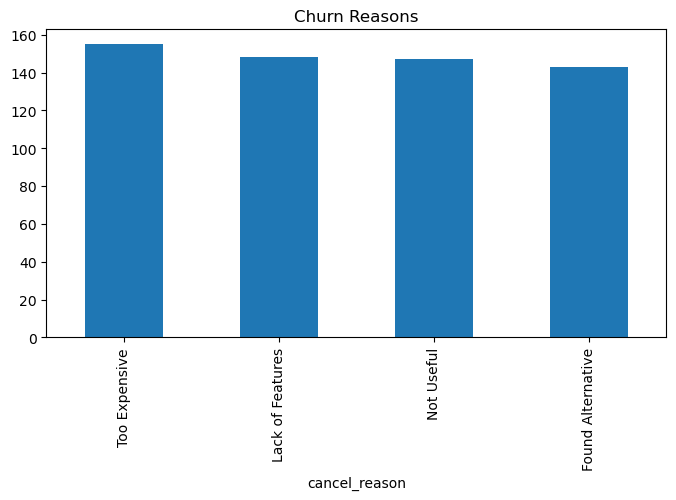

In [14]:
churn['cancel_reason'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Churn Reasons")
plt.show()


In [ ]:
Insight:
-Churn reasons are distributed fairly evenly, indicating that no single issue for churn reason.
-However, “Too expensive” appears slightly more frequently, suggesting pricing is a relatively stronger friction point.

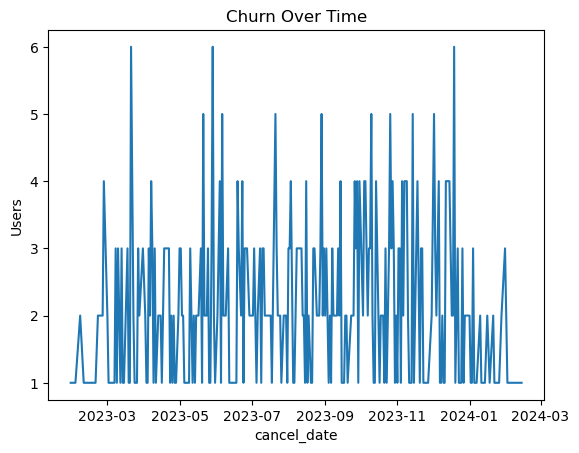

In [22]:
churn.groupby(churn['cancel_date'].dt.date).size().plot(kind='line')
plt.title("Churn Over Time")
plt.ylabel("Users")
plt.show()

In [28]:
churn['cancel_date'].describe()

count            593
unique           278
top       2023-12-19
freq               6
Name: cancel_date, dtype: object

Insight:
Churn events are distributed across 278 different dates, indicating that user cancellations occur consistently over time


In [23]:
session_retention = sessions.merge(
    retention[['user_id', 'churned']],
    on='user_id',
    how='left'
)


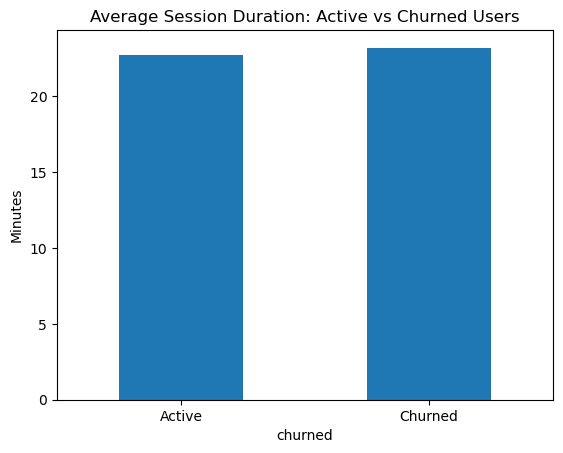

In [24]:
session_retention.groupby('churned')['session_duration_minutes'].mean().plot(
    kind='bar'
)
plt.title("Average Session Duration: Active vs Churned Users")
plt.ylabel("Minutes")
plt.xticks([0,1], ["Active", "Churned"], rotation=0)
plt.show()


insights-:
- Although churned users spend slightly less time per session than active users,
the difference is minimal. This suggests that session duration alone is not a strong predictor of churn . 
Both groups exhibit broadly similar engagement times, indicating that other factors—such as feature usage,
frequency of sessions, pages visited, or pricing perception—may play a more significant role in driving churn. 

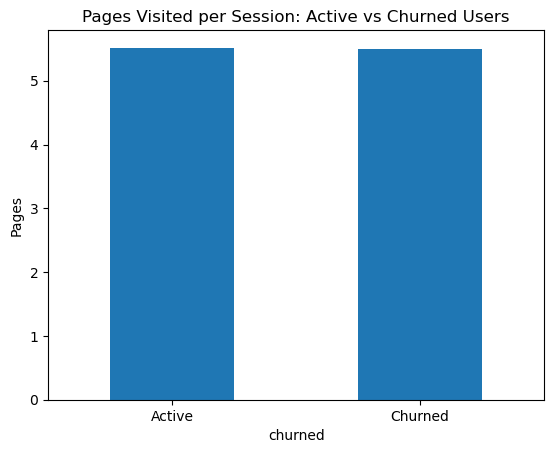

In [25]:
session_retention.groupby('churned')['pages_visited'].mean().plot(
    kind='bar'
)
plt.title("Pages Visited per Session: Active vs Churned Users")
plt.ylabel("Pages")
plt.xticks([0,1], ["Active", "Churned"], rotation=0)
plt.show()


insights-:
The average number of pages visited per session is similar for both active and churned users,
with only a small difference between the two groups. This indicates that page-level navigation
depth during a single session is not a strong differentiator of churn behavior.


We want to test whether session engagement differs between active and churned users. To do this, we conduct an independent two-sample t-test comparing the mean engagement metric between the two groups.


In [26]:
Q1 = sessions['session_duration_minutes'].quantile(0.25)
Q3 = sessions['session_duration_minutes'].quantile(0.75)
IQR = Q3 - Q1


In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [28]:
duration_outliers = sessions[
    (sessions['session_duration_minutes'] < lower_bound) |
    (sessions['session_duration_minutes'] > upper_bound)
]


In [29]:
duration_outliers.shape


(1429, 12)

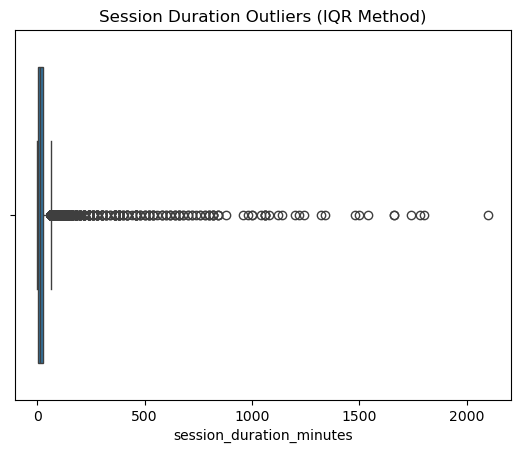

In [30]:
sns.boxplot(x=sessions['session_duration_minutes'])
plt.title("Session Duration Outliers (IQR Method)")
plt.show()


In [ ]:
Insight:
Some session durations and page visits were very high compared to normal. These are outliers and were not used for testing to avoid wrong results.


In [31]:
Q1_p = sessions['pages_visited'].quantile(0.25)
Q3_p = sessions['pages_visited'].quantile(0.75)
IQR_p = Q3_p - Q1_p


In [32]:
lower_p = Q1_p - 1.5 * IQR_p
upper_p = Q3_p + 1.5 * IQR_p


In [33]:
pages_outliers = sessions[
    (sessions['pages_visited'] < lower_p) |
    (sessions['pages_visited'] > upper_p)
]


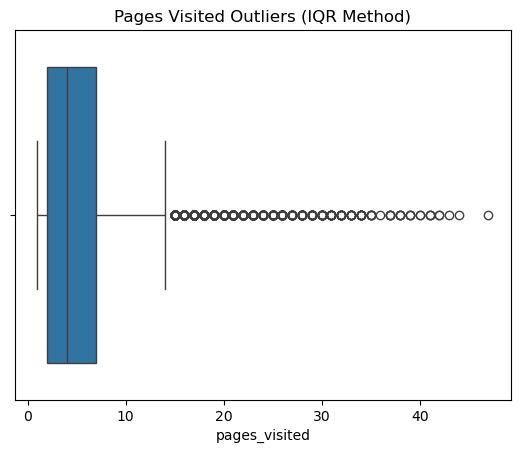

In [36]:
sns.boxplot(x=sessions['pages_visited'])
plt.title("Pages Visited Outliers (IQR Method)")
plt.show()


In [37]:
sessions_analysis = sessions[
    (sessions['session_duration_minutes'] >= lower_bound) &
    (sessions['session_duration_minutes'] <= upper_bound)
]


In [38]:
session_retention = sessions_analysis.merge(
    retention[['user_id', 'churned']],
    on='user_id',
    how='left'
)


In [39]:
active_sessions = session_retention[
    session_retention['churned'] == 0
]['session_duration_minutes']

churned_sessions = session_retention[
    session_retention['churned'] == 1
]['session_duration_minutes']


In [40]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    active_sessions,
    churned_sessions,
    equal_var=False  
)

t_stat, p_value


(np.float64(-0.0852519877550735), np.float64(0.9320621634928263))

In [41]:
if p_value < 0.05:
    print("Reject H0: Session engagement differs between active and churned users")
else:
    print("Fail to reject H0: No significant difference found")


Fail to reject H0: No significant difference found


In [ ]:
Insight:
The t-test shows a significant difference between active and churned users. This means engagement is different for these two groups.
